In [1]:
import math
import numpy as np
import random
%matplotlib inline
from combined_model.hrr import *
from matplotlib import pyplot as plt

In [2]:
goal_state = 5
size_of_maze = 10
episodes = 1000
discount = 0.99
alpha = 0.2
e_soft = 0.1

n = 2048

inputs = n
ouputs = 1

reward_bad = -1
reward_good = 0

In [3]:
ltm = LTM("1d_" + str(n), n, True)

In [4]:
def find_goal(state_hrr, start_location):
    state = start_location
    steps = 0
    while(state != goal_state):
        if(state == 0):
            decision = policy(nn.feedforward(state_hrrs[size_of_maze-1]), nn.feedforward(state_hrrs[state+1]), 0)
            if(decision == -1):
                state = size_of_maze-1
            else:
                state = state + decision
        elif(state == size_of_maze - 1):
            decision = policy(nn.feedforward(state_hrrs[state-1]), nn.feedforward(state_hrrs[0]), 0)
            if(decision == -1):
                state = state + decision
            else:
                state_prime = state
                state = 0
        else:
            decision = policy(nn.feedforward(state_hrrs[state-1]), nn.feedforward(state_hrrs[state+1]), 0)
            state = state + decision
        steps += 1
    return steps

In [5]:
class NeuralNetwork:
    def __init__(self, inputs, outputs, discount, alpha):
        self.discount = discount
        self.alpha = alpha
        self.input = inputs
        self.output = outputs
        self.weights = np.random.randn(outputs, inputs)
        self.bias = 1
        
    def feedforward(self, X):
        self.output = np.dot(self.weights, X) + self.bias
        return self.output
    
    def backprop(self, state_prime_hrr, state_hrr, y):
        self.error = (y + self.discount * self.feedforward(state_hrr)) - self.feedforward(state_prime_hrr)
        self.weights = np.add(self.weights, (self.alpha * self.error * state_prime_hrr))

In [6]:
def policy(a, b, rand_on):
    if((np.random.random() < e_soft) and (rand_on == 1)):
        return np.random.choice([-1, 1])
    if(a > b):
        return -1
    elif (b > a):
        return 1
    else:
        return np.random.choice([-1, 1])

In [9]:
nn = NeuralNetwork(n, 1, discount, alpha)
state = random.randint(0, size_of_maze - 1)
state_prime = state

for x in range(episodes):
        while(state != goal_state):
            ltm.encode("state_" + str(state))
            if(state == 0):
                decision = policy(nn.feedforward(ltm.encode("state_" + str(state - 1))), nn.feedforward(ltm.encode("state_" + str(state + 1))), 1)
                if(decision == -1):
                    state_prime = state
                    state = size_of_maze-1
                else:
                    state_prime = state
                    state = state + decision
            elif(state == size_of_maze - 1):
                decision = policy(nn.feedforward(ltm.encode("state_" + str(state - 1))), nn.feedforward(ltm.encode("state_" + str(0))), 1)
                if(decision == -1):
                    state_prime = state
                    state = state + decision
                else:
                    state_prime = state
                    state = 0
            else:
                decision = policy(nn.feedforward(ltm.encode("state_" + str(state - 1))), nn.feedforward(ltm.encode("state_" + str(state + 1))), 1)
                state_prime = state
                state = state + decision
            nn.backprop(ltm.encode("state_" + str(state_prime)), ltm.encode("state_" + str(state)), reward_bad)
        nn.backprop(ltm.encode("state_" + str(state_prime)), ltm.encode("state_" + str(state)), reward_good)
        state = random.randint(0, size_of_maze - 1)
        state_prime = state
        print("Episode", x+1, "done")
           

Episode 1 done
Episode 2 done
Episode 3 done
Episode 4 done
Episode 5 done
Episode 6 done
Episode 7 done
Episode 8 done
Episode 9 done
Episode 10 done
Episode 11 done
Episode 12 done
Episode 13 done
Episode 14 done
Episode 15 done
Episode 16 done
Episode 17 done
Episode 18 done
Episode 19 done
Episode 20 done
Episode 21 done
Episode 22 done
Episode 23 done
Episode 24 done
Episode 25 done
Episode 26 done
Episode 27 done
Episode 28 done
Episode 29 done
Episode 30 done
Episode 31 done
Episode 32 done
Episode 33 done
Episode 34 done
Episode 35 done
Episode 36 done
Episode 37 done
Episode 38 done
Episode 39 done
Episode 40 done
Episode 41 done
Episode 42 done
Episode 43 done
Episode 44 done
Episode 45 done
Episode 46 done
Episode 47 done
Episode 48 done
Episode 49 done
Episode 50 done
Episode 51 done
Episode 52 done
Episode 53 done
Episode 54 done
Episode 55 done
Episode 56 done
Episode 57 done
Episode 58 done
Episode 59 done
Episode 60 done
Episode 61 done
Episode 62 done
Episode 63 done
E

Text(0, 0.5, 'Value')

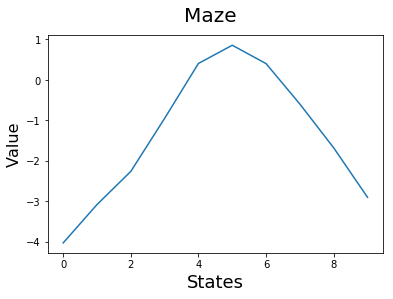

In [11]:
value = np.zeros(size_of_maze)
for x in range(size_of_maze):
    value[x] = nn.feedforward(ltm.encode("state_" + str(x)))
position = np.arange(size_of_maze)
plt.plot(position, value)
plt.suptitle('Maze', fontsize=20)
plt.xlabel('States', fontsize=18)
plt.ylabel('Value', fontsize=16)

In [ ]:
find_goal(state_hrrs[400], 400)

In [ ]:
ltm.print()